In [154]:
# import os
# os.getcwd()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



In [180]:
import sys
sys.path.append("../lib/")

In [181]:
# img="./../img/mariana.jpg"
img="./../img/valve.png"

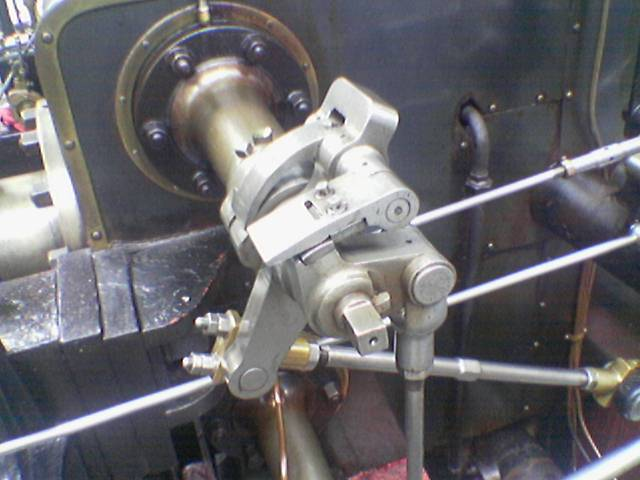

In [182]:
from IPython.display import Image
Image(filename=img) 

In [217]:
from PIL import Image
from numpy import array
im = array(Image.open(img))
im = im[:, :, 0]

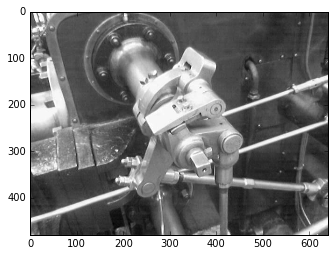

In [218]:
from matplotlib.pyplot import imshow, show, subplot, figure, gray, title, gray, axis
imshow(im)
show()

In [219]:
print im.shape

(480, 640)


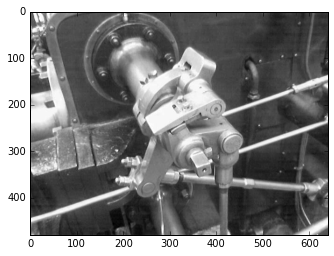

In [260]:
from filters import gaussian_filter
g_filter = gaussian_filter(im, s=3, sigma=.005)
imshow(g_filter)
show()

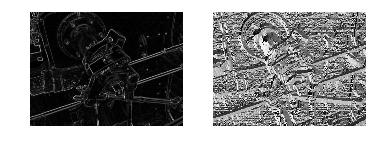

In [261]:
from filters import gradient_filter
gradient_img, tan_img  = gradient_filter(g_filter)

subplot(121)
axis('off')
imshow(gradient_img)

subplot(122)
axis('off')
imshow(tan_img)
show()

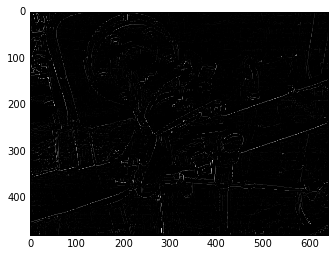

In [262]:
from filters import nonmax_suppression
from __future__ import division
import numpy as np
loc_max = nonmax_suppression(gradient_img, tan_img)
imshow(loc_max)
# loc_max /= np.max(loc_max)
# loc_max[loc_max>0]=1.0
show()

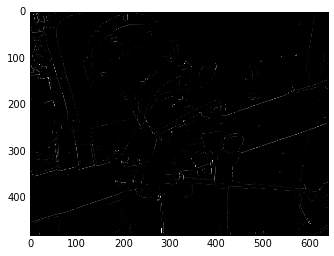

In [259]:
from filters import thresholding
thresholding = thresholding(loc_max, lo_val = 0.1 , hi_val=0.7)
imshow(thresholding)
show()

start
5174 5174 5174.0


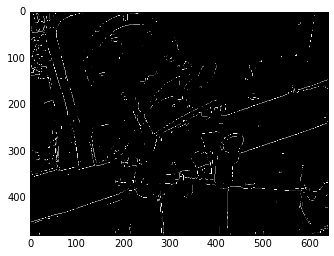

In [256]:
from numpy import array as nparray
from numpy import where, concatenate, zeros
from numpy import sum as npsum
from numpy import max as npmax
edge    = zeros(thresholding.shape)
max_val =  npmax(thresholding)

edge[thresholding==1.0]=1.0

print "start"

def track_max(edge, thresh, x, depth, directions):
    if depth < 1:
        return
    for a in directions:
        d = np.rint([np.cos(a), np.sin(a)]).astype(int)
        i,j = x+d
        if 0 <= i < thresh.shape[0]  and 0 <= j < thresh.shape[0]:
            if  0.2 < thresh[i,j] < 1:
                edge[i,j] = 1.0
                track_max(edge, thresh, array([i,j]), depth - 1, [a])

old_ones_len = 0
directions   = np.array(range(4))*np.pi/2
while True:
    ones = [(i,j) for i,j in concatenate(where(edge == 1.0)).reshape(2,-1).T]
    print len(edge[edge>0]),
    for p in ones:
        i, j = p
        edge[i,j] += 1.0
#         directions = [nparray([i,j]) for i in xrange(-1,2) for j in xrange(-1,2) if (i,j)!=(0,0)]
    for p in ones:
        i, j = p
        track_max(edge, thresholding, nparray([i,j]), 20, directions)
    if old_ones_len == len(edge[edge>0]):
        break
    else:
        old_ones_len = len(edge[edge>0])

edge[edge>0] = 1.0
print npsum(edge)
gray()
imshow(edge)
show()

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.hist(thresholding.ravel(),256,[0.1,1.0]); plt.show()

In [ ]:
print gradient_img